## Import the necessary libraries

The first step is to import the necessary libraries.

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Load the data

In [270]:
df = pd.read_csv('../data/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Processment

In [271]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [272]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

As we can see, the data does not have any missing values. However, the ID column is not necessary for the analysis, so we will remove it.

In [273]:
df = df.drop(["id"], axis=1)

## Catetorical Variables Encoding

The next step is to encode the categorical variables. For that, we will replace the values of the target variable (diagnosis) by 0 and 1, where 0 represents benign and 1 represents malignant.

All the data is numerical except for the target variable (diagnosis). Since we need to use this variable to train the model, we will encode it as well.



In [274]:
# Encode the diagnosis column
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Analyzing the correlation between the diagnosis and the other variables

The next step is to analyze the correlation between the diagnosis and the other variables. For that, we will use the Pearson correlation coefficient, which measures the linear relationship between two variables. The Pearson correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship.

diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

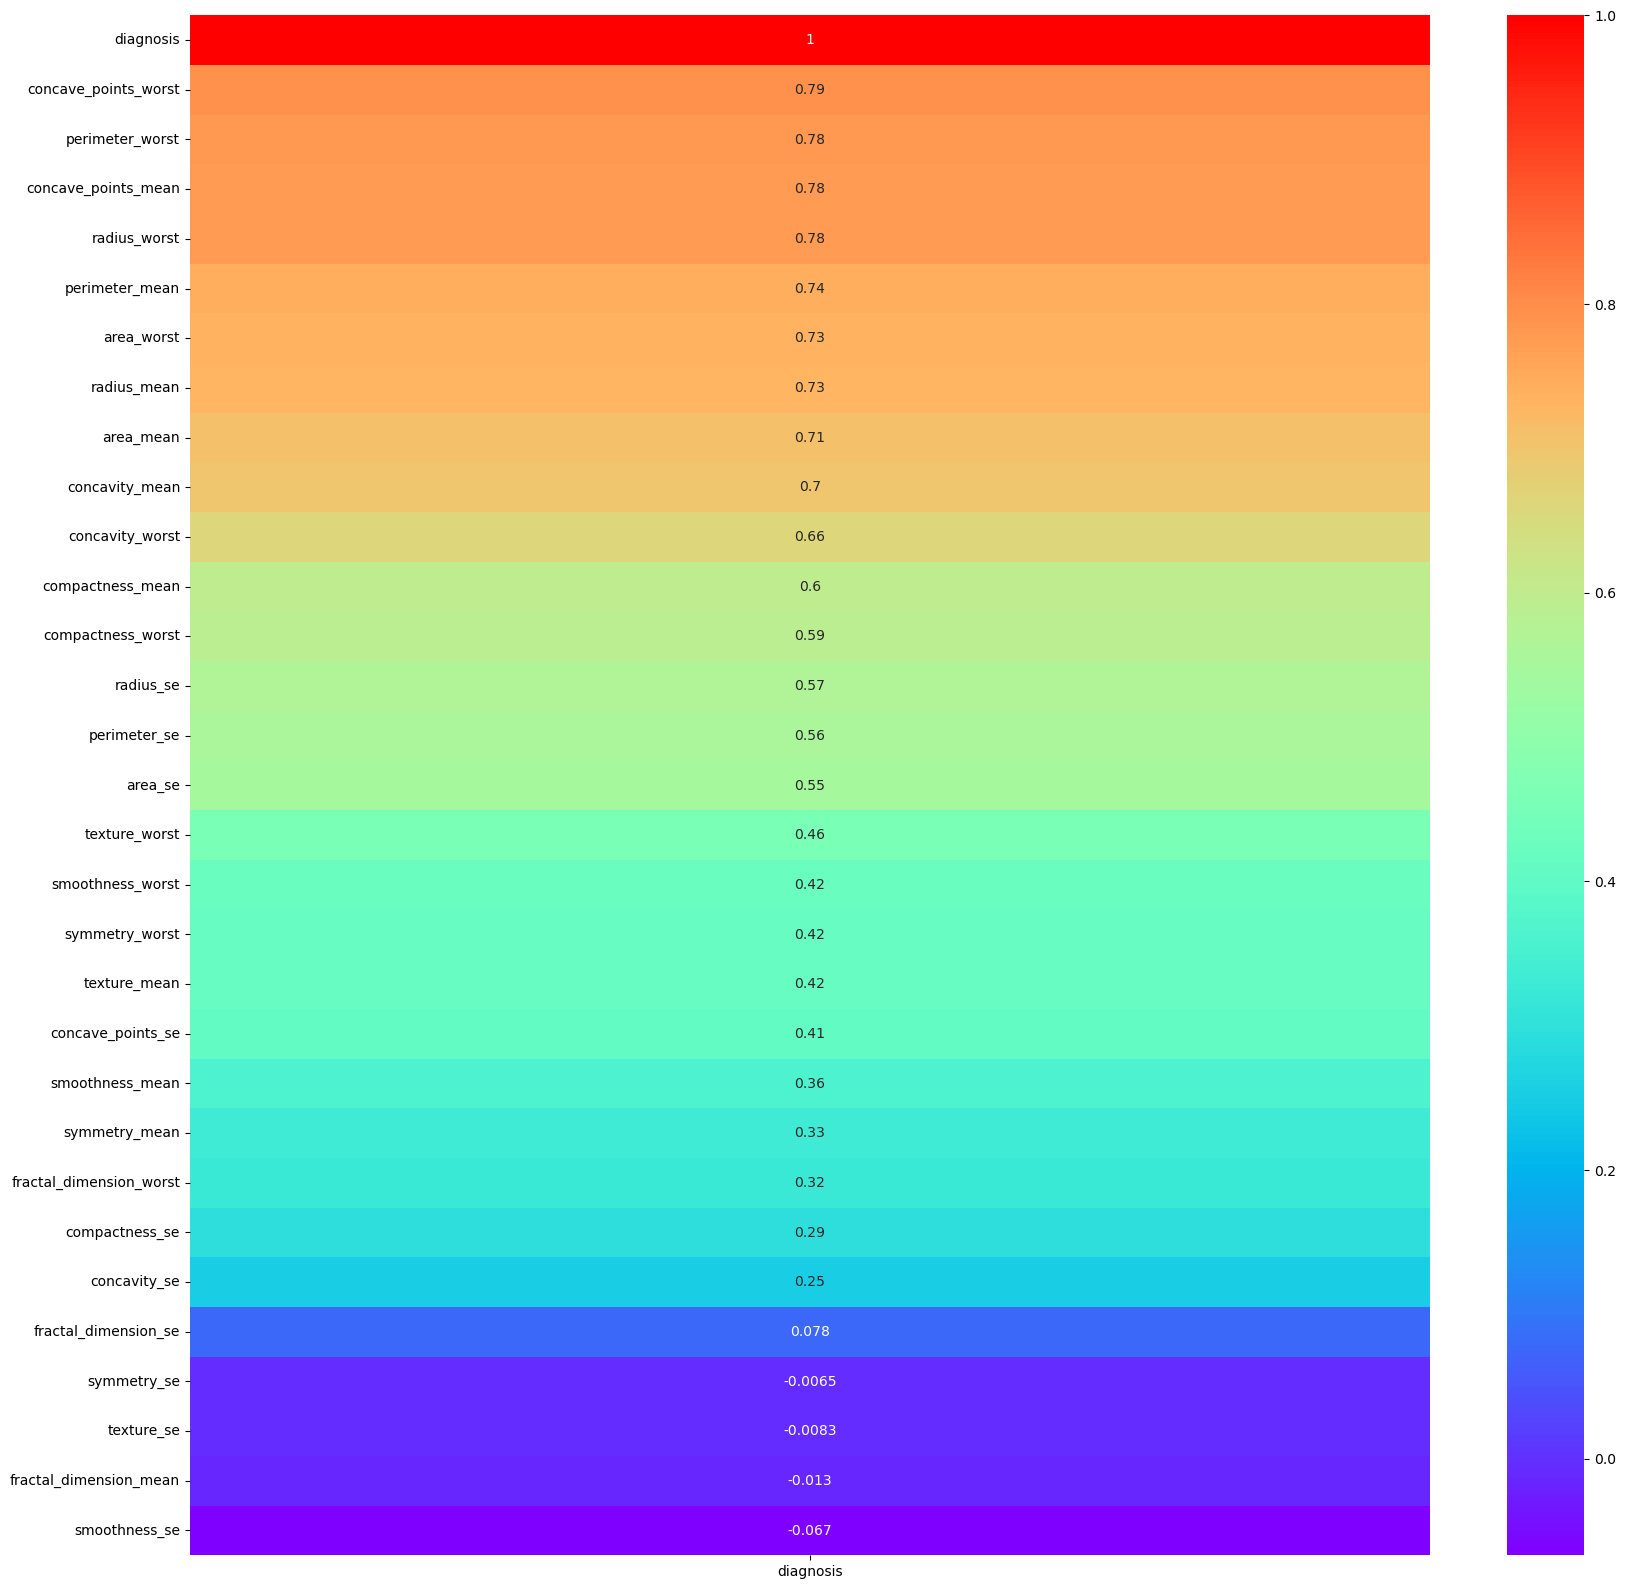

In [275]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), cbar=True, annot=True, cmap='rainbow')
print(df.corr()['diagnosis'].sort_values(ascending=False))
plt.show()



## Analyzing the correlation between the features

The next step is to analyze the correlation between the features. >This is important because highly correlated features can lead to multicollinearity, which can affect the performance of the model. 

Same features are perfectly correlated, so we will apply a mask to hide the upper triangle of the correlation matrix in order to make it easier to visualize.

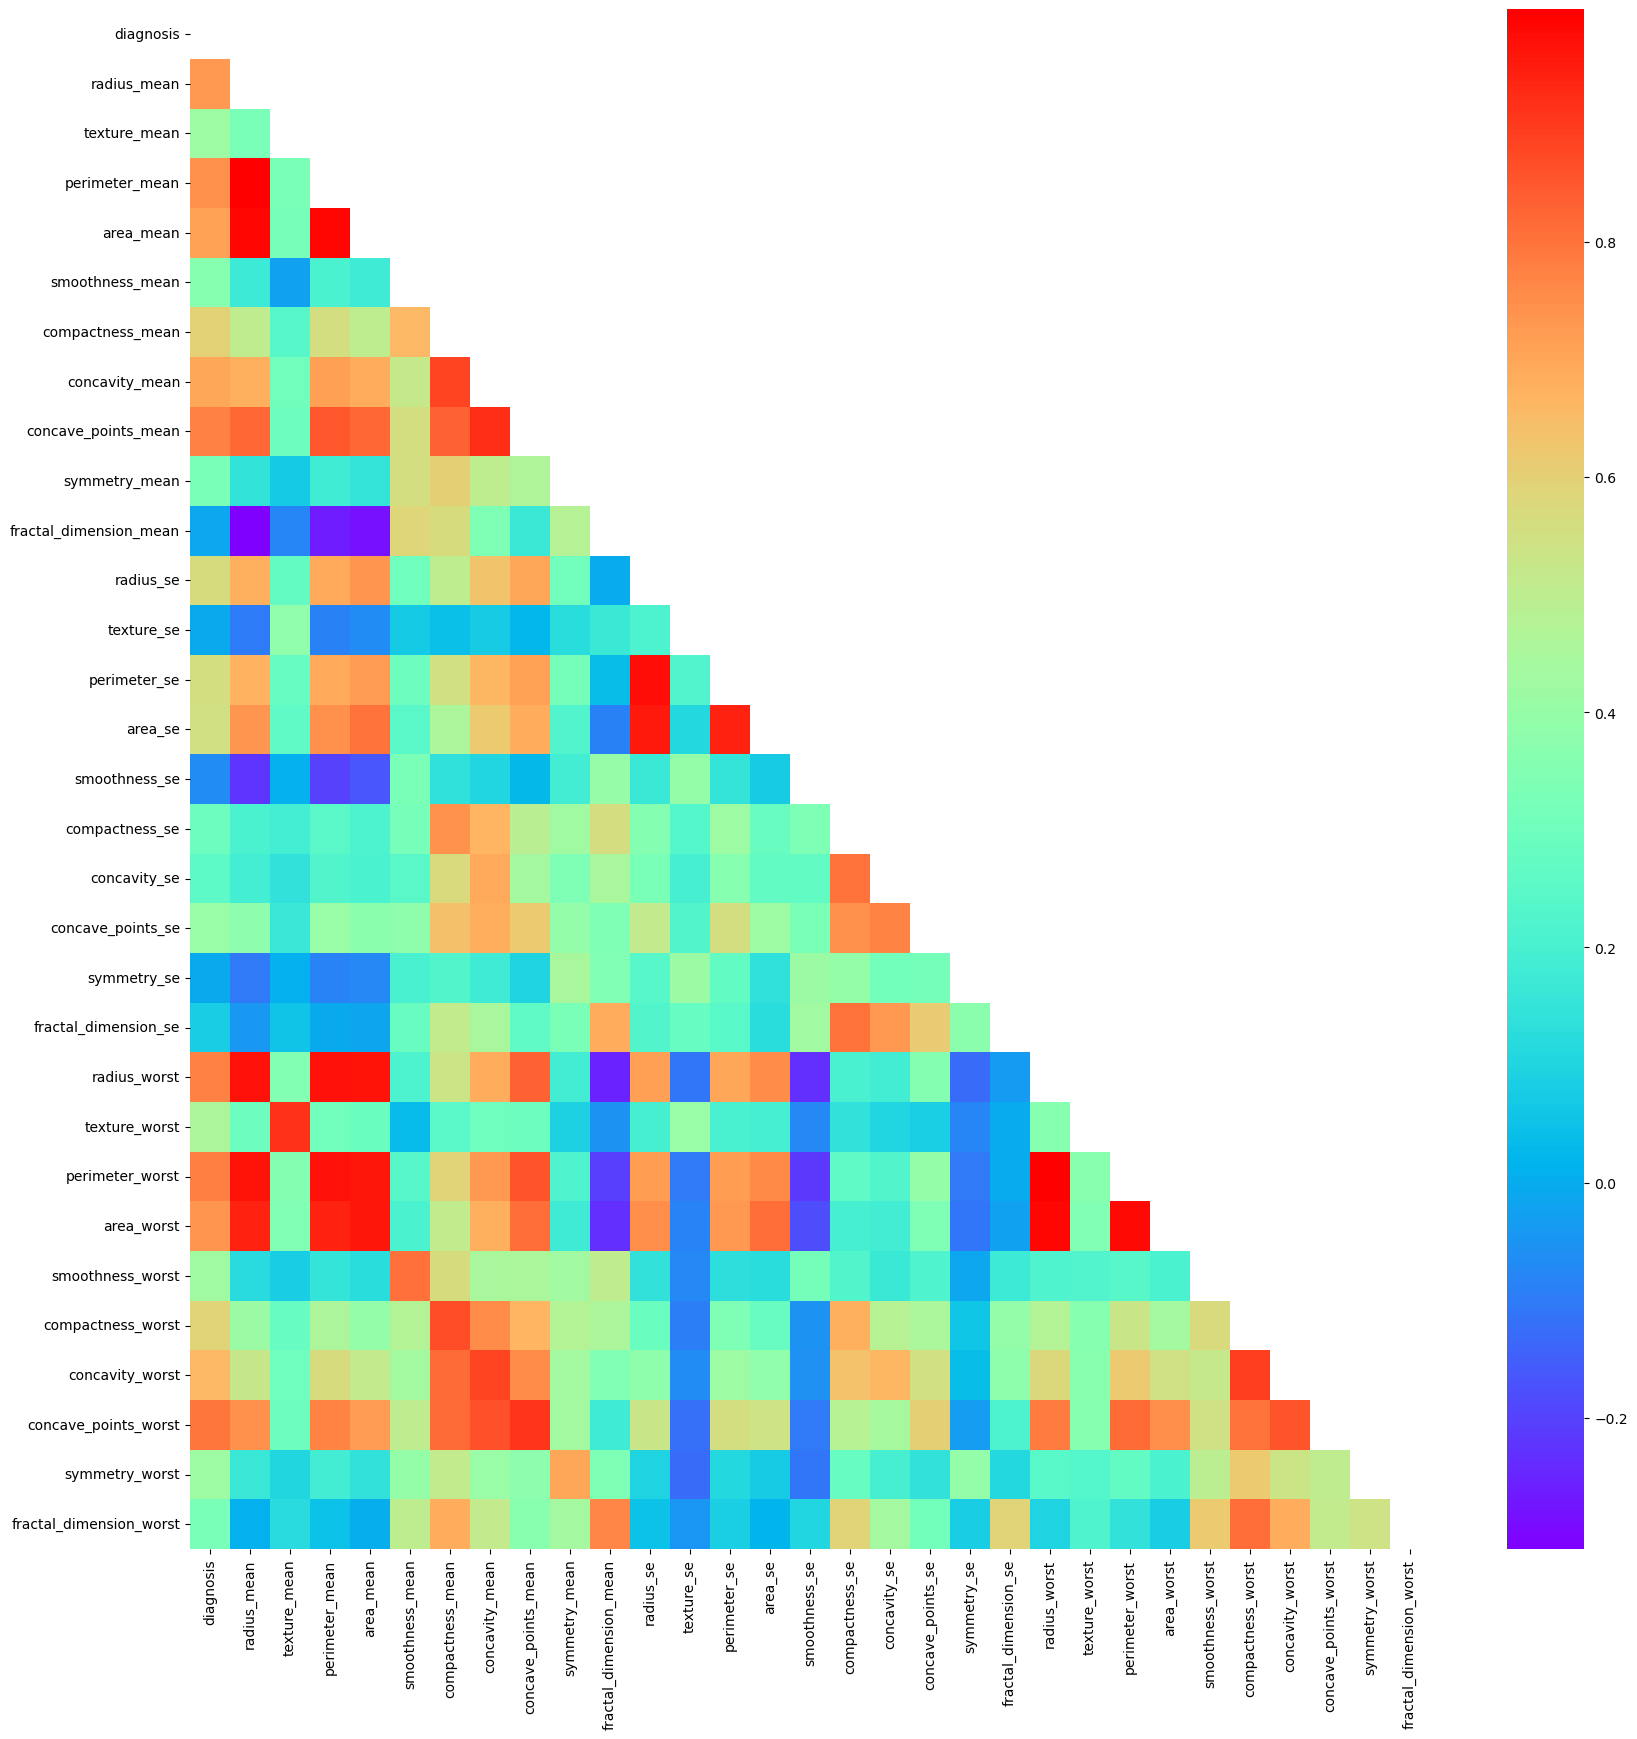

In [276]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, cbar=True, annot=True, cmap='rainbow')

plt.show()

We can see that there are some features that are highly correlated with each other. Most of them were expected, such as perimeter_mean, area_mean, and radius_mean, which are all measures of the size of the tumor. 

In order to reduce the dimensionality of the data and avoid multicollinearity, we will remove some features that are highly correlated with each other since they provide similar information.

We will first list the most correlated features.

In [277]:
# Set the correlation threshold
threshold = 0.95

# Find the highly correlated features
highly_correlated = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Sort the highly correlated features by correlation coefficient
highly_correlated_sorted = sorted(highly_correlated, key=lambda x: abs(x[2]), reverse=True)

# Print the sorted highly correlated features
for feature1, feature2, correlation in highly_correlated_sorted:
    print(f"{feature1} and {feature2} have a correlation of {correlation:.2f}")

# Optionally, you can merge these features into one feature based on your specific requirements.


radius_mean and perimeter_mean have a correlation of 1.00
radius_worst and perimeter_worst have a correlation of 0.99
radius_mean and area_mean have a correlation of 0.99
perimeter_mean and area_mean have a correlation of 0.99
radius_worst and area_worst have a correlation of 0.98
perimeter_worst and area_worst have a correlation of 0.98
radius_se and perimeter_se have a correlation of 0.97
perimeter_mean and perimeter_worst have a correlation of 0.97
radius_mean and radius_worst have a correlation of 0.97
perimeter_mean and radius_worst have a correlation of 0.97
radius_mean and perimeter_worst have a correlation of 0.97
area_mean and radius_worst have a correlation of 0.96
area_mean and area_worst have a correlation of 0.96
area_mean and perimeter_worst have a correlation of 0.96
radius_se and area_se have a correlation of 0.95


We can observe that features like 'mean' and 'se' are highly correlated. We will remove the 'se' features since they are less correlated with the target variable.



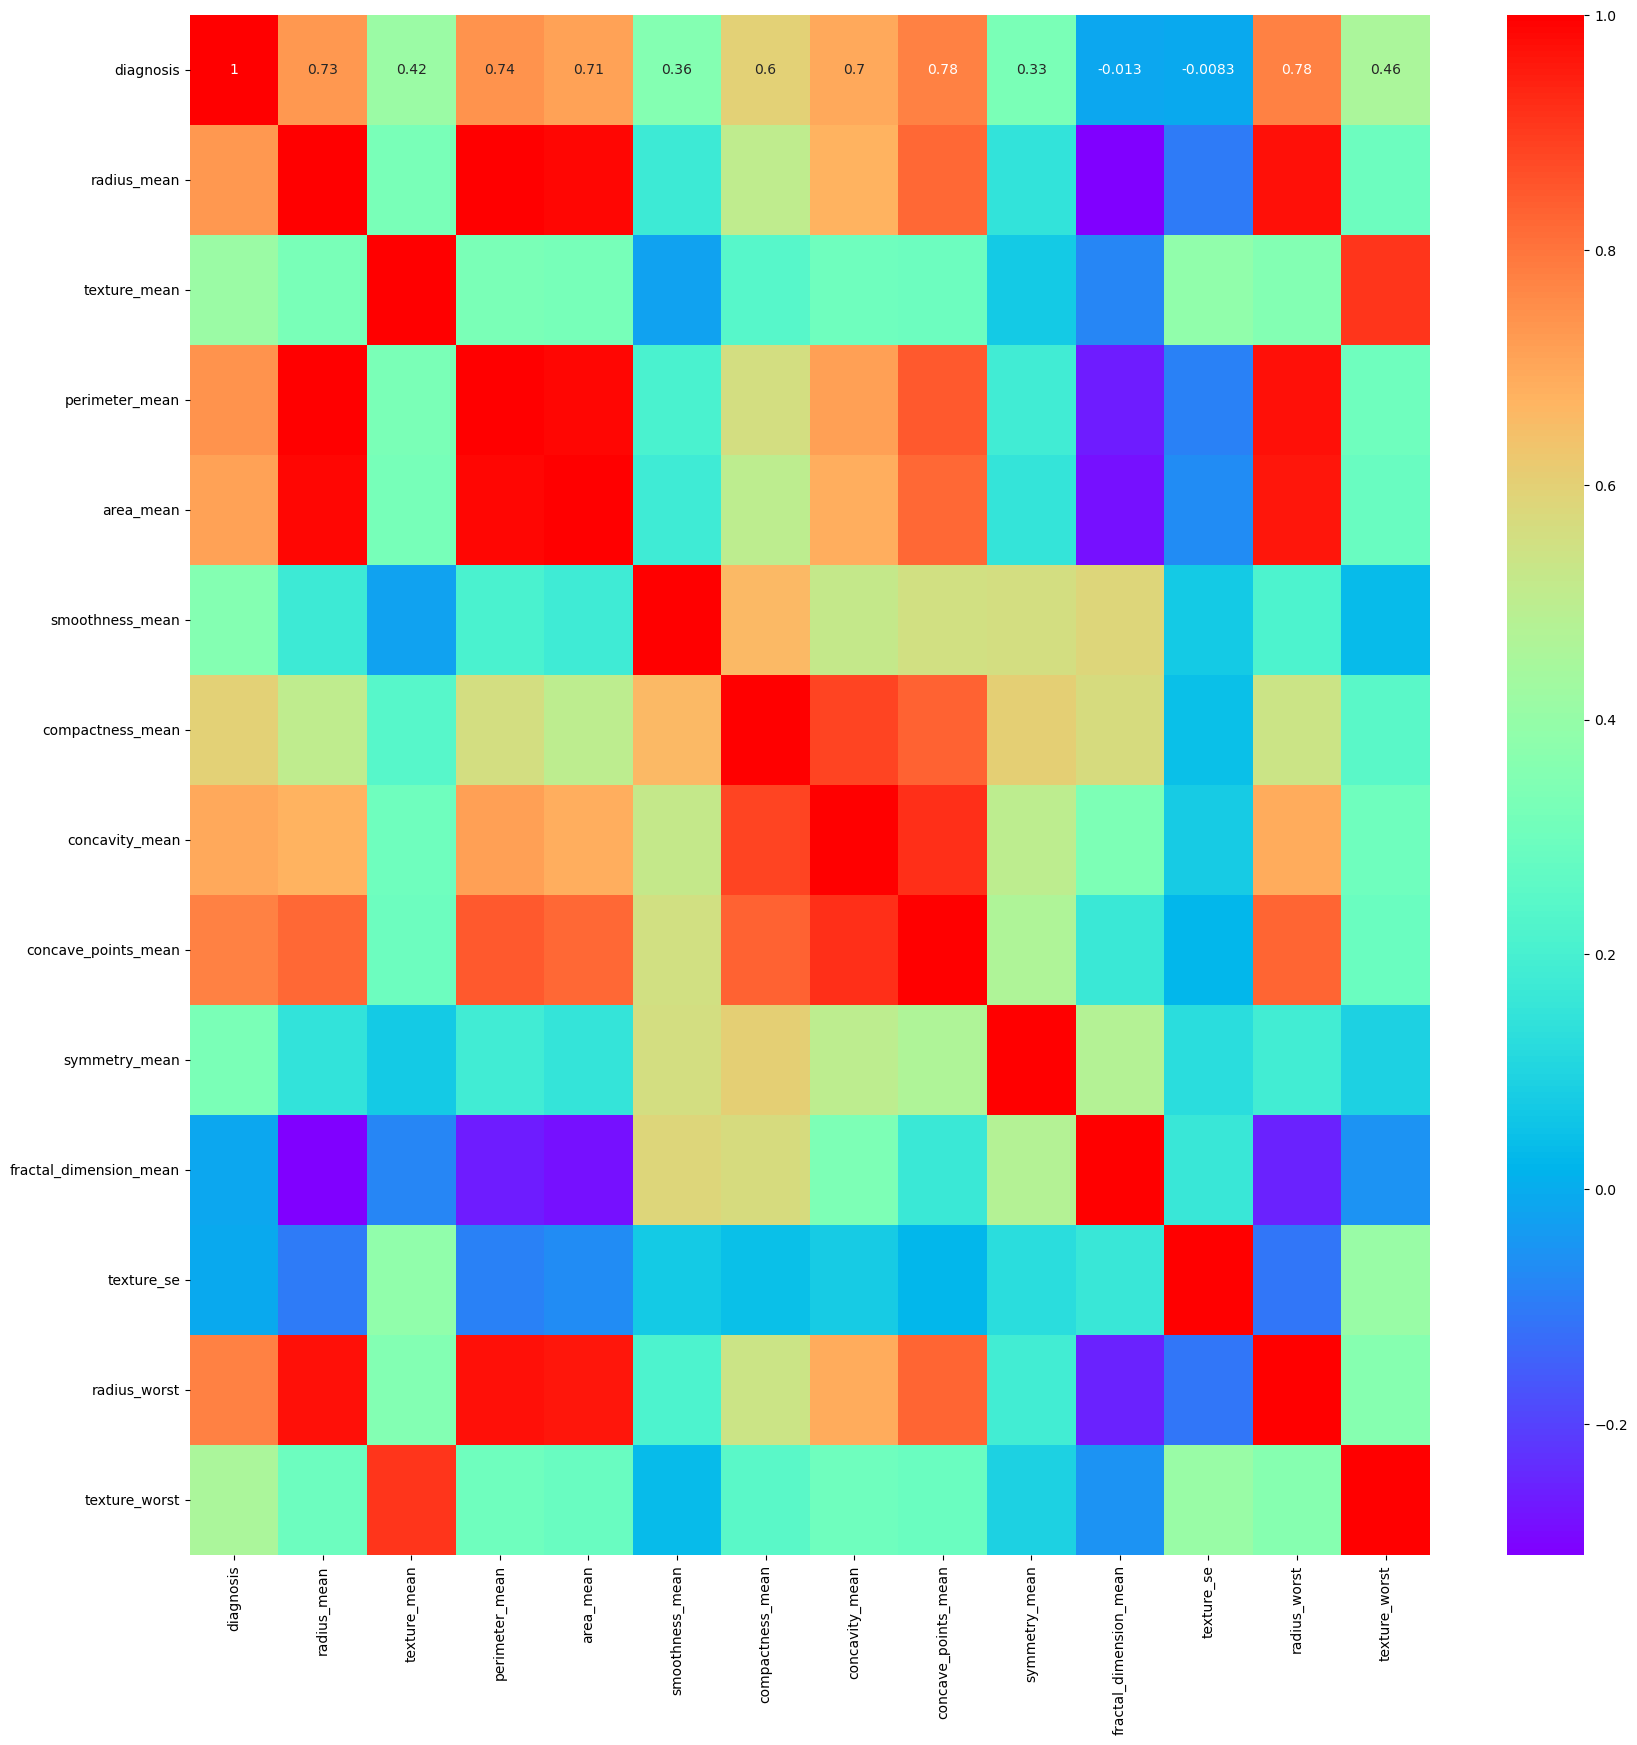

In [278]:
# Remove 'se' and 'worst' columns
df = df.drop(['perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
              'symmetry_se', 'fractal_dimension_se', 'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'radius_se'], axis=1)

# print correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cbar=True, annot=True, cmap='rainbow')
plt.show()
